<a href="https://colab.research.google.com/github/LucasMartinscode/Python/blob/main/An%C3%A1liseDesordemMental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**


---

Análisar a saúde mental na industria de tecnologia utilizando conceitos de estatística aplicada, entender o desempenho de cada país e evolução dos mesmos.

**Métodos usados**



*   Funções no python
*   Implementação de banco de dados
*   Estatística descritiva
*   Queries de SQL
*   Visualização de dados



**Stack**



*   Pandas
*   Jupyter notebook
*   MySQL connector
*   SQLite
*   NumPy
*   Matplotlib
*   Seaborn
*   Plotly








**Data Sources**



*   Banco de dados SQL encontrado no Kaggle



In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Criando uma função e estabelecendo uma conexão com o banco de dados, para manioulação e análise de dados.


In [ ]:
con = sqlite3.connect('mental_health.sqlite') # Conectando-se com o banco de dados.

In [ ]:
cursor = con.cursor()                                                        # Descobrindo o nome das tabelas para visualização e tratamento de dados.
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
tabelas = cursor.fetchall()

for tabela in tabelas:
     print(tabela[0])

con.close()



Answer
Question
Survey


In [ ]:
con = sqlite3.connect('mental_health.sqlite') # Conectando-se ao banco de dados

tabelas = ['Answer', 'Question', 'Survey']  # Criando um dicinário para as tabelas presentes no arquivo

for tabela in tabelas:                      #Criando um loop para as tabelas 
    print(f"Conteúdo da tabela '{tabela}':")
    print("-" * 30)

    query = f"SELECT * FROM {tabela}"
    df = pd.read_sql_query(query, con)

   
    print(df)
    
    print("\n")


con.close()

Conteúdo da tabela 'Answer':
------------------------------
                AnswerText  SurveyID  UserID  QuestionID
0                       37      2014       1           1
1                       44      2014       2           1
2                       32      2014       3           1
3                       31      2014       4           1
4                       31      2014       5           1
...                    ...       ...     ...         ...
236893               Other      2016    2689         117
236894             Support      2016    2690         117
236895  Back-end Developer      2016    2691         117
236896     DevOps/SysAdmin      2016    2692         117
236897               Other      2016    2693         117

[236898 rows x 4 columns]


Conteúdo da tabela 'Question':
------------------------------
                                          questiontext  questionid
0                                    What is your age?           1
1                              

Agora que encontrei o conteúdo de cada tabela, irei filtrar por perguntas, ou seja, escolher perguntas aderentes para a análise de dados e depois com o comando inner join, irei juntas os IDS do question id para análise do usuario. 

In [ ]:
pd.set_option('display.max_rows', None) #Configurando para imprimir todas as linhas. 

con = sqlite3.connect('mental_health.sqlite') # Conectando-se ao banco de dados

tabelas = ['Question']  # Criando um dicinário para a tabela question apenas

for tabela in tabelas:                      #Criando um loop para a tabela
    print(f"Conteúdo da tabela '{tabela}':")
    print("-" * 30)

    query = f"SELECT * FROM {tabela}"
    df = pd.read_sql_query(query, con)

print(df)


con.close()

Conteúdo da tabela 'Question':
------------------------------
                                          questiontext  questionid
0                                    What is your age?           1
1                                 What is your gender?           2
2                         What country do you live in?           3
3    If you live in the United States, which state ...           4
4                               Are you self-employed?           5
5      Do you have a family history of mental illness?           6
6    Have you ever sought treatment for a mental he...           7
7    How many employees does your company or organi...           8
8    Is your employer primarily a tech company/orga...           9
9    Does your employer provide mental health benef...          10
10   Is your anonymity protected if you choose to t...          11
11   Would you bring up a mental health issue with ...          12
12   Is your primary role within your company relat...          13


Pela quantidade de perguntas, escolhi fazer análises com base na idade, gênero, benefícios, raça, transtorno e se trabalham de home office

In [ ]:
con = sqlite3.connect('mental_health.sqlite') # Conectando-se à base de dados
# Criando uma consulta no sql para exibir os dados que preciso para fazer a análise sinalizada acima usando o comando inner join para unir as ids das perguntas com as resp.
#das quais criei ou seja (idade: questionID 1 / gênero: questionID 2 / benefícios de trabalho: questionID 10 / gênero: question ID: 89 / raça: question ID: 33 e por fim home office: question ID 118
query = ''' 
    SELECT
        q.questiontext AS Pergunta,
        a.AnswerText AS Resposta,
        a.SurveyID
    FROM
        Answer AS a
        INNER JOIN Question AS q ON a.questionid = q.questionid
    WHERE
        a.questionid IN (1, 2, 10, 89, 33, 118)
'''

df = pd.read_sql_query(query, con) # Lendo os dados da consulta em um DataFrame

con.close()

print(df.head(10)) #Imprimindo as 10 primeiras linhas para verificar se esta tudo correto com as queries. 

            Pergunta Resposta  SurveyID
0  What is your age?       37      2014
1  What is your age?       44      2014
2  What is your age?       32      2014
3  What is your age?       31      2014
4  What is your age?       31      2014
5  What is your age?       33      2014
6  What is your age?       35      2014
7  What is your age?       39      2014
8  What is your age?       42      2014
9  What is your age?       23      2014


No DataFrame, possui algumas perguntas que estão sem respostas no formato "-1", irei remover todas respostas nesse formato, para deixar a tabela mais limpa. 

In [ ]:
df = df[df['Resposta'] != '-1'] # Removendo todas linhas que possui -1

print(df.head(10))

            Pergunta Resposta  SurveyID
0  What is your age?       37      2014
1  What is your age?       44      2014
2  What is your age?       32      2014
3  What is your age?       31      2014
4  What is your age?       31      2014
5  What is your age?       33      2014
6  What is your age?       35      2014
7  What is your age?       39      2014
8  What is your age?       42      2014
9  What is your age?       23      2014


In [ ]:
perguntas_unicas = df['Pergunta'].unique() #Obtendo as 5 perguntas diferentes presentes na coluna "Pergunta"

for pergunta in perguntas_unicas: #Exibindo as perguntas únicas
    print(pergunta)

What is your age?
What is your gender?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you currently have a mental health disorder?
Do you work remotely?
What is your race?


Agora que organizei tudo, irei descobrir quais formatos existem nas respostas para começar a extrair informações.

In [ ]:
# Descobrindo os formatos da pergunta "What is your gender?"
formatos_genero = df.loc[df['Pergunta'] == 'What is your gender?', 'Resposta'].unique()
print("Formatos da pergunta 'What is your gender?':")
for formato in formatos_genero:
    print(formato)
print()

# Descobrindo os formatos da pergunta "Does your employer provide mental health benefits as part of healthcare coverage?"
formatos_beneficios = df.loc[df['Pergunta'] == 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Resposta'].unique()
print("Formatos da pergunta 'Does your employer provide mental health benefits as part of healthcare coverage?':")
for formato in formatos_beneficios:
    print(formato)
print()

# Descobrindo os formatos da pergunta "Do you currently have a mental health disorder?"
formatos_transtorno = df.loc[df['Pergunta'] == 'Do you currently have a mental health disorder?', 'Resposta'].unique()
print("Formatos da pergunta 'Do you currently have a mental health disorder?':")
for formato in formatos_transtorno:
    print(formato)
print()

# Descobrindo os formatos da pergunta "Do you work remotely?"
formatos_homeoffice = df.loc[df['Pergunta'] == 'Do you work remotely?', 'Resposta'].unique()
print("Formatos da pergunta 'Do you work remotely?':")
for formato in formatos_homeoffice:
    print(formato)
print()

# Descobrindo os formatos da pergunta "What is your race?"
formatos_raca = df.loc[df['Pergunta'] == 'What is your race?', 'Resposta'].unique()
print("Formatos da pergunta 'What is your race?':")
for formato in formatos_raca:
    print(formato)

Formatos da pergunta 'What is your gender?':
Female
Male
Male-ish
Trans-female
something kinda male?
queer/she/they
non-binary
Nah
All
Enby
fluid
Genderqueer
Androgyne
Agender
Guy (-ish) ^_^
male leaning androgynous
Trans woman
Neuter
Female (trans)
queer
A little about you
p
ostensibly male, unsure what that really means
Bigender
Female assigned at birth
fm
Transitioned, M2F
Genderfluid (born female)
Other/Transfeminine
Female or Multi-Gender Femme
Androgynous
male 9:1 female, roughly
Other
nb masculine
none of your business
genderqueer
Human
Genderfluid
genderqueer woman
mtf
Queer
Fluid
Male/genderqueer
Nonbinary
human
Unicorn
Male (trans, FtM)
Genderflux demi-girl
female-bodied; no feelings about gender
AFAB
Transgender woman
male
female
male/androgynous
uhhhhhhhhh fem genderqueer?
God King of the Valajar
Non-binary
Agender/genderfluid
sometimes
Woman-identified
Contextual
Non binary
Genderqueer demigirl
Genderqueer/non-binary
nonbinary
Female-ish
\-
trans woman
Transfeminine
None
O

Pronto, agora que tenho todas essas informações irei começar a criar plotagem gráficas, para a construção das análises

**Gráfico de pizza, mostrando a porcentagem de pessoas que possuem uma transtorno mental**

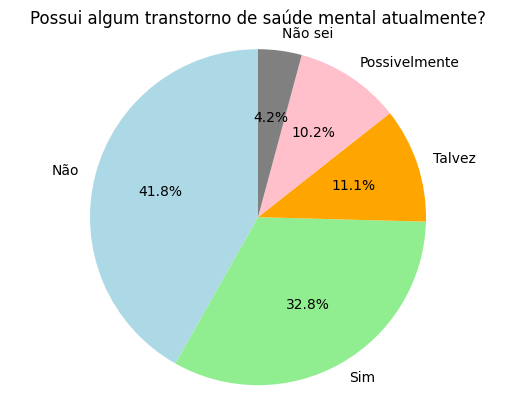

In [ ]:
# Filtrar o DataFrame para obter apenas as respostas da pergunta desejada
df_mental_disorder = df[df['Pergunta'] == 'Do you currently have a mental health disorder?']

# Contar a frequência de cada resposta
count_by_answer = df_mental_disorder['Resposta'].value_counts()

# Preparar os dados para o gráfico de pizza
labels = ['Não', 'Sim', 'Talvez', 'Possivelmente', 'Não sei']
sizes = count_by_answer.values

# Definir cores para as fatias do gráfico de pizza
colors = ['lightblue', 'lightgreen', 'orange', 'pink', 'gray']

# Criar o gráfico de pizza
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Adicionar título ao gráfico
plt.title('Possui algum transtorno de saúde mental atualmente?')

# Exibir o gráfico
plt.axis('equal')
plt.show()